## Aims
- look at the data in processed.json
- construct data frame to be able to slice the data 

## Task
Read from processed.json

In [1]:
import json
import pandas as pd

with open("./data/processed.json") as data_file:
    json_data = json.load(data_file)

    affiliates = [d.get("affiliates") for d in json_data]
    key = [d.get("key") for d in json_data]
    title = [d.get("title") for d in json_data]
    level = [d.get("level") for d in json_data]
    num_of_projects = [d.get("num_of_projects") for d in json_data]
    tags = [d.get("tags") for d in json_data]
    average_rating = [d.get("average_rating") for d in json_data]
    count = [d.get("count") for d in json_data]
    stats = [d.get("stats") for d in json_data]


    data = {
        "title": title,
        "affiliates": affiliates,
        "key": key,
        "level": level,
        "num_of_projects": num_of_projects,
        "tags": tags,
        "average_rating": average_rating,
        "count": count,
        "stats": stats,
    }

    df = pd.DataFrame(data, columns = ["title", "affiliates", "key", "level", "num_of_projects", "tags", "average_rating", "count", "stats"])

In [2]:
df.head()

,title,affiliates,key,level,num_of_projects,tags,average_rating,count,stats
0,Product Manager,[],nd036,beginner,0,"[Product Marketing, Pricing Strategy, Market R...",4.568627,51,"[{'rating': 5, 'count': 32, 'percentage': 62.7..."
1,AI for Business Leaders,[],nd054,intermediate,0,"[Deep Learning, Unsupervised Learning, Compute...",5.000000,2,"[{'rating': 5, 'count': 2, 'percentage': 100, ..."
2,Intro to Machine Learning with TensorFlow,[{'image': '/assets/iridium/images/shared/part...,nd230,beginner,0,"[Machine Learning, Google]",4.847826,46,"[{'rating': 5, 'count': 39, 'percentage': 84.7..."
3,UX Designer,[],nd578,beginner,0,"[UX, UI, Wireframing, Product Design, UX/UI, U...",4.724324,185,"[{'rating': 5, 'count': 145, 'percentage': 78...."
4,Data Streaming,[],nd029,advanced,0,"[faust, python, ksql, sparksql, apache avro, a...",3.884058,68,"[{'rating': 5, 'count': 28, 'percentage': 40.5..."


---

## Look at average Ratings and spread of average ratings

In [5]:
average_ratings_df = df["average_rating"]
average_ratings_df.describe()

count    63.000000
mean      4.416854
std       0.877063
min       0.000000
25%       4.500000
50%       4.588435
75%       4.711656
max       5.000000
Name: average_rating, dtype: float64

## Lets just remove some of chaff - Like affiliates data

In [7]:
df = df[
    ["title", "average_rating", "key", "count", "level", "stats", "num_of_projects", "tags"]
].dropna()

df.head()

,title,average_rating,key,count,level,stats,num_of_projects,tags
0,Product Manager,4.568627,nd036,51,beginner,"[{'rating': 5, 'count': 32, 'percentage': 62.7...",0,"[Product Marketing, Pricing Strategy, Market R..."
1,AI for Business Leaders,5.000000,nd054,2,intermediate,"[{'rating': 5, 'count': 2, 'percentage': 100, ...",0,"[Deep Learning, Unsupervised Learning, Compute..."
2,Intro to Machine Learning with TensorFlow,4.847826,nd230,46,beginner,"[{'rating': 5, 'count': 39, 'percentage': 84.7...",0,"[Machine Learning, Google]"
3,UX Designer,4.724324,nd578,185,beginner,"[{'rating': 5, 'count': 145, 'percentage': 78....",0,"[UX, UI, Wireframing, Product Design, UX/UI, U..."
4,Data Streaming,3.884058,nd029,68,advanced,"[{'rating': 5, 'count': 28, 'percentage': 40.5...",0,"[faust, python, ksql, sparksql, apache avro, a..."


## Lets group the courses by level

In [13]:
df_levels = df.groupby(["level"]).mean()
df_levels.head()

,average_rating,count,num_of_projects
level,,,
Advanced,4.720930,82.000000,4.000000
Beginner,4.563096,129.666667,3.666667
Intermediate,3.973497,144.000000,4.333333
Intermediate,4.425632,178.000000,5.000000
advanced,4.515061,179.272727,1.909091


looks like the level `intermediate` and `advanced` are normalized (so should clean that)


## Lets clean the table for now

In [14]:
df.loc[df["level"].str.contains("Advanced"), "level"] = "advanced"
df.loc[df["level"].str.contains("Intermediate"), "level"] = "intermediate"
df.loc[df["level"].str.contains("Beginner"), "level"] = "beginner"

In [15]:
df.head()

,title,average_rating,key,count,level,stats,num_of_projects,tags
0,Product Manager,4.568627,nd036,51,beginner,"[{'rating': 5, 'count': 32, 'percentage': 62.7...",0,"[Product Marketing, Pricing Strategy, Market R..."
1,AI for Business Leaders,5.000000,nd054,2,intermediate,"[{'rating': 5, 'count': 2, 'percentage': 100, ...",0,"[Deep Learning, Unsupervised Learning, Compute..."
2,Intro to Machine Learning with TensorFlow,4.847826,nd230,46,beginner,"[{'rating': 5, 'count': 39, 'percentage': 84.7...",0,"[Machine Learning, Google]"
3,UX Designer,4.724324,nd578,185,beginner,"[{'rating': 5, 'count': 145, 'percentage': 78....",0,"[UX, UI, Wireframing, Product Design, UX/UI, U..."
4,Data Streaming,3.884058,nd029,68,advanced,"[{'rating': 5, 'count': 28, 'percentage': 40.5...",0,"[faust, python, ksql, sparksql, apache avro, a..."


## Lets see if the cleaning worked above

In [17]:
groupby_df = df.groupby(["level"]).mean()
groupby_df.head()

,average_rating,count,num_of_projects
level,,,
advanced,4.532217,171.166667,2.083333
beginner,4.669868,248.666667,3.714286
intermediate,4.142525,266.851852,4.703704


Ok cool - looks

In [28]:
sorted_df = df.sort_values(by = ["level", "average_rating", "count", "num_of_projects"], ascending = False)
sorted_df.head()

,title,average_rating,key,count,level,stats,num_of_projects,tags
1,AI for Business Leaders,5.000000,nd054,2,intermediate,"[{'rating': 5, 'count': 2, 'percentage': 100, ...",0,"[Deep Learning, Unsupervised Learning, Compute..."
23,iOS Developer,5.000000,nd003-br,0,intermediate,"[{'rating': 5, 'count': 4, 'percentage': 100, ...",0,[]
43,Learn Unreal VR Foundations,4.857143,nd117,4,intermediate,"[{'rating': 5, 'count': 6, 'percentage': 85.71...",0,[]
50,Android Developer,4.734921,nd801,901,intermediate,"[{'rating': 5, 'count': 1616, 'percentage': 81...",14,"[android, App Development, Android App Develop..."
21,Become a Data Analyst,4.722488,nd002-ent,161,intermediate,"[{'rating': 5, 'count': 170, 'percentage': 81....",22,"[r, hadoop, python, d3]"


---

## Beginner courses sorted by average-rating, count and number of projects

In [150]:
beginner_df = sorted_df[sorted_df["level"] == "beginner"]
beginner_df.head(5)

,title,average_rating,key,count,level,stats,num_of_projects,tags
39,VR Foundations,5.000000,nd105,0,beginner,"[{'rating': 5, 'count': 1, 'percentage': 100, ...",0,[Virtual Reality]
53,Android Basics,4.884615,nd803-br,5,beginner,"[{'rating': 5, 'count': 23, 'percentage': 88.4...",0,[]
2,Intro to Machine Learning with TensorFlow,4.847826,nd230,46,beginner,"[{'rating': 5, 'count': 39, 'percentage': 84.7...",0,"[Machine Learning, Google]"
52,Android Basics,4.846098,nd803,1399,beginner,"[{'rating': 5, 'count': 2415, 'percentage': 88...",12,"[mobile, apps, development, android, App Devel..."
16,Programming for Data Science with R,4.833333,nd118,12,beginner,"[{'rating': 5, 'count': 10, 'percentage': 83.3...",3,"[R, nd118, SQL, Advance SQl, Basic Data Scienc..."


## Intermediate courses sorted by average-rating, count and number of projects

In [149]:
intermediate_df = sorted_df[sorted_df["level"] == "intermediate"]
intermediate_df.head(5)

,title,average_rating,key,count,level,stats,num_of_projects,tags
1,AI for Business Leaders,5.000000,nd054,2,intermediate,"[{'rating': 5, 'count': 2, 'percentage': 100, ...",0,"[Deep Learning, Unsupervised Learning, Compute..."
23,iOS Developer,5.000000,nd003-br,0,intermediate,"[{'rating': 5, 'count': 4, 'percentage': 100, ...",0,[]
43,Learn Unreal VR Foundations,4.857143,nd117,4,intermediate,"[{'rating': 5, 'count': 6, 'percentage': 85.71...",0,[]
50,Android Developer,4.734921,nd801,901,intermediate,"[{'rating': 5, 'count': 1616, 'percentage': 81...",14,"[android, App Development, Android App Develop..."
21,Become a Data Analyst,4.722488,nd002-ent,161,intermediate,"[{'rating': 5, 'count': 170, 'percentage': 81....",22,"[r, hadoop, python, d3]"


### Advanced courses as well

In [38]:
advanced_df = sorted_df[sorted_df["level"] == "advanced"]
advanced_df.head(5)

,title,average_rating,key,count,level,stats,num_of_projects,tags
32,Mobile Web Specialist,4.807229,nd024,163,advanced,"[{'rating': 5, 'count': 287, 'percentage': 86....",3,[]
28,Self Driving Car Engineer,4.746765,nd013,520,advanced,"[{'rating': 5, 'count': 897, 'percentage': 82....",14,"[Computer Vision, Sensor Fusion, Localization,..."
9,Sensor Fusion Engineer,4.720930,nd313,82,advanced,"[{'rating': 5, 'count': 67, 'percentage': 77.9...",4,"[Lidar, Radar, Kalman Filters, Radar Calibrati..."
57,Deep Reinforcement Learning,4.676259,nd893,117,advanced,"[{'rating': 5, 'count': 105, 'percentage': 75....",0,"[Viedeo Games, neural network, neural networks..."
55,Computer Vision,4.591440,nd891,214,advanced,"[{'rating': 5, 'count': 184, 'percentage': 71....",0,"[CNN, Recognise Faces, Image Captioning, RNN, ..."


### Lets look at the number break down in the level courses

In [47]:
print("Number of advanced course:", len(advanced_df))
print("Number of intermediate course:", len(intermediate_df))
print("Number of beginner course:", len(beginner_df))

Number of advanced course: 12
Number of intermediate course: 27
Number of beginner course: 21


### Lets sort intermediate by count

In [69]:
intermediate = intermediate_df.sort_values(by = ["count"], ascending = False)
intermediate.head(10)

,title,average_rating,key,count,level,stats,num_of_projects,tags
59,Front End Web Developer,4.663966,nd001,1301,intermediate,"[{'rating': 5, 'count': 2192, 'percentage': 77...",0,"[css, html, javascript, UX Design, User interf..."
37,Deep Learning,4.639004,nd101,1043,intermediate,"[{'rating': 5, 'count': 1661, 'percentage': 76...",5,"[Neural Network, AI, Pytorch, Numpy, CNN, Mach..."
20,Data Analyst,4.560143,nd002,984,intermediate,"[{'rating': 5, 'count': 1423, 'percentage': 72...",0,"[Dataset, Data Science, Data Storage, Data Pro..."
50,Android Developer,4.734921,nd801,901,intermediate,"[{'rating': 5, 'count': 1616, 'percentage': 81...",14,"[android, App Development, Android App Develop..."
31,React,4.588435,nd019,308,intermediate,"[{'rating': 5, 'count': 451, 'percentage': 76....",3,"[React, Front-end , Redux, React Native, React..."
22,iOS Developer,4.610306,nd003,301,intermediate,"[{'rating': 5, 'count': 456, 'percentage': 73....",14,"[swift, iOS, Swift, Make App, Make iOS App, Bu..."
17,Data Engineer,4.481229,nd027,283,intermediate,"[{'rating': 5, 'count': 197, 'percentage': 67....",6,"[data pipelines, data lakes, Data model, Apach..."
42,Intro to Self-Driving Cars,4.680217,nd113,224,intermediate,"[{'rating': 5, 'count': 288, 'percentage': 78....",8,"[Self Driving Car, Automation, Bayesian Thinki..."
5,Front End Web Developer,4.556561,nd0011,221,intermediate,"[{'rating': 5, 'count': 159, 'percentage': 71....",6,"[object oriented, object-oriented, UI, UX, Use..."
14,C++,4.466368,nd213,219,intermediate,"[{'rating': 5, 'count': 149, 'percentage': 66....",5,"[classes, structures, pointers, leakage, funct..."


In [77]:
intermediate = intermediate[["title","count","stats"]]

intermediate = intermediate.sort_values(by = ["count"], ascending=False)

intermediate.head(10)

,title,count,stats
59,Front End Web Developer,1301,"[{'rating': 5, 'count': 2192, 'percentage': 77..."
37,Deep Learning,1043,"[{'rating': 5, 'count': 1661, 'percentage': 76..."
20,Data Analyst,984,"[{'rating': 5, 'count': 1423, 'percentage': 72..."
50,Android Developer,901,"[{'rating': 5, 'count': 1616, 'percentage': 81..."
31,React,308,"[{'rating': 5, 'count': 451, 'percentage': 76...."
22,iOS Developer,301,"[{'rating': 5, 'count': 456, 'percentage': 73...."
17,Data Engineer,283,"[{'rating': 5, 'count': 197, 'percentage': 67...."
42,Intro to Self-Driving Cars,224,"[{'rating': 5, 'count': 288, 'percentage': 78...."
5,Front End Web Developer,221,"[{'rating': 5, 'count': 159, 'percentage': 71...."
14,C++,219,"[{'rating': 5, 'count': 149, 'percentage': 66...."


In [166]:
idf = intermediate_df.sort_values(by = ["average_rating", "count"], ascending=False)
idf = idf[["title", "average_rating", "tags"]]

idf.filter(items=["tags"])

,tags
1,"[Deep Learning, Unsupervised Learning, Compute..."
23,[]
43,[]
50,"[android, App Development, Android App Develop..."
21,"[r, hadoop, python, d3]"
42,"[Self Driving Car, Automation, Bayesian Thinki..."
59,"[css, html, javascript, UX Design, User interf..."
51,[]
24,"[Data Analytics, No Coding, Alyterx, Tableau, ..."
37,"[Neural Network, AI, Pytorch, Numpy, CNN, Mach..."


### lets isolate data engineering by row index

In [85]:
data_engineer = intermediate.loc[[17]]
data_engineer

,title,count,stats
17,Data Engineer,283,"[{'rating': 5, 'count': 197, 'percentage': 67...."


### lets expand data engineer

lets look at the breakdown of the ratings in data-engineering

In [108]:
stats = data_engineer["stats"].iloc[0]
stats

[{'rating': 5, 'count': 197, 'percentage': 67.23549488054607, '_id': 5},
 {'rating': 4, 'count': 62, 'percentage': 21.160409556313994, '_id': 4},
 {'rating': 3, 'count': 19, 'percentage': 6.484641638225256, '_id': 3},
 {'rating': 2, 'count': 8, 'percentage': 2.7303754266211606, '_id': 2},
 {'rating': 1, 'count': 7, 'percentage': 2.3890784982935154, '_id': 1}]

In [118]:
data_df = pd.DataFrame(data = stats)
data_df

,rating,count,percentage,_id
0,5,197,67.235495,5
1,4,62,21.160410,4
2,3,19,6.484642,3
3,2,8,2.730375,2
4,1,7,2.389078,1


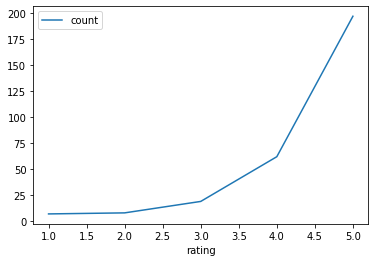

In [121]:
data_df.plot(kind="line", x="rating", y="count")

### plot intermediate nanodegrees

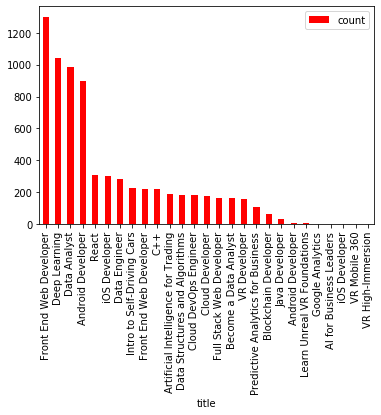

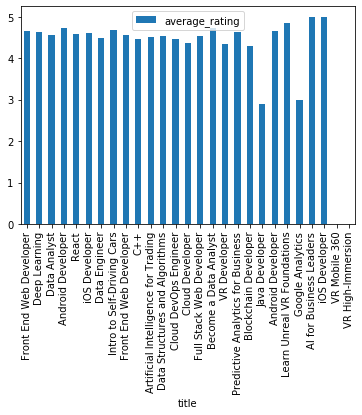

In [152]:
sorted_intermediate = intermediate_df.sort_values(by = ["count"], ascending = False)
sorted_intermediate.plot(kind="bar", y="count", x="title", color='red')
sorted_intermediate.plot(kind="bar", y="average_rating", x="title")

### lets sort beginner by count

In [148]:
beginner = beginner_df.sort_values(by = ["count"], ascending = False)
beginner.head(5)

,title,average_rating,key,count,level,stats,num_of_projects,tags
52,Android Basics,4.846098,nd803,1399,beginner,"[{'rating': 5, 'count': 2415, 'percentage': 88...",12,"[mobile, apps, development, android, App Devel..."
19,Introduction to Programming,4.627980,nd000,1215,beginner,"[{'rating': 5, 'count': 1660, 'percentage': 74...",5,"[python, css, html, javascript, HTML, CSS, Pyt..."
30,Digital Marketing,4.681858,nd018,663,beginner,"[{'rating': 5, 'count': 895, 'percentage': 78....",8,"[No Coding, Social Media Marketing, Social Med..."
35,Business Analytics,4.681579,nd098,369,beginner,"[{'rating': 5, 'count': 298, 'percentage': 78....",0,"[Excel, No Coding, SQL, Tableau, Descriptive S..."
34,AI Programming with Python,4.548165,nd089,295,beginner,"[{'rating': 5, 'count': 328, 'percentage': 75....",0,"[Python, Numpy , Pandas, neural network, Anaco..."


### Plot beginner courses

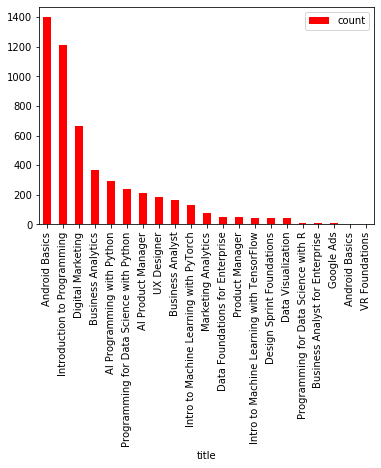

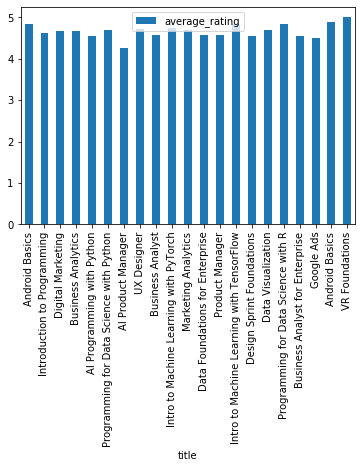

In [145]:
beginner.plot(kind="bar", y="count", x="title", color='red')
beginner.plot(kind="bar", y="average_rating", x="title")

# Summary

There are a total of 60 courses: 

Catalogue breakdown is of the following:  

    * Number of advanced course: 12  
    * Number of intermediate course: 27  
    * Number of beginner course: 21  
    
The top four intermediate courses with the most over 800 ratings respectively:
    - Front end Web Developer
    - Deep Learning
    - Data Analyst
    - Android Developer


Things to do later:
- Look into the tags and what tags denote a better rating.
- Look at what languages get a better rating, course length.
- Look at effect of teacher and when the course started.

